In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
%matplotlib inline

import json
import sys   
import os

from itertools import chain
from operator import itemgetter

from datetime import datetime
from dateutil import parser

In [7]:
files = [f for f in os.listdir('.') if os.path.isfile(f)]
[f for f in files if "_battles.json" in f]

['2018-10-17_battles.json',
 '2018-10-22_battles.json',
 '2018-11-06_battles.json']

In [9]:
## Somehow pd.read_json does not load my data collected. 
## Pandas throw me a OSError if I do read_json.
## I suspect it is due to the large file size of my battles_temp.json 
## beacuse I can read half of the file with read_json.
## I am appending each line into a list called data then turn that list into dataframe.
data = []
with open('2018-10-22_battles.json', 'r') as f:
    for idx, line in enumerate(f):
#         if idx == 115152:
#             print (line[7500:7600])
        try:
            data.append(json.loads(line))
#             if idx == 120000:
#                 print("done")
#                 break
        except Exception as e:
            print(e)
            print(idx)
            break

In [10]:
battles_df = pd.DataFrame(data)
battles_df

,arena,challengeType,deckType,mode,opponent,opponentCrowns,team,teamCrowns,teamSize,tournamentTag,type,utcTime,winCountBefore,winner
0,"{'name': 'Barbarian Bowl', 'arena': 'Arena 3',...",None,slotDeck,"{'name': 'TeamVsTeamLadder', 'deck': 'Collecti...","[{'tag': '9Q822LL9C', 'name': 'знамя18', 'crow...",0,"[{'tag': 'VPLYRQP8', 'name': 'kindkiller', 'cr...",1,2,NaN,2v2,1540181385,NaN,1
1,"{'name': 'Training Camp', 'arena': 'Arena 0', ...",None,slotDeck,"{'name': 'TeamVsTeamLadder', 'deck': 'Collecti...","[{'tag': '9YLGP8LVY', 'name': 'SkyFlop', 'crow...",1,"[{'tag': 'RG0V8VGJ', 'name': 'Moore_22', 'crow...",0,2,NaN,2v2,1540181191,NaN,-1
2,"{'name': 'Legendary Arena', 'arena': 'Arena 12...",None,slotDeck,"{'name': 'TeamVsTeamLadder', 'deck': 'Collecti...","[{'tag': '9UUJ8JV2J', 'name': '玖熙', 'crownsEar...",1,"[{'tag': 'RG0V8VGJ', 'name': 'Moore_22', 'crow...",3,2,NaN,2v2,1540180995,NaN,2
3,"{'name': 'Electro Valley', 'arena': 'Arena 11'...",None,slotDeck,"{'name': 'TeamVsTeamLadder', 'deck': 'Collecti...","[{'tag': '9VJY02Y8V', 'name': 'MASTER “ PRO ""'...",2,"[{'tag': '9GG8VYCJR', 'name': 'QueenB', 'crown...",1,2,NaN,2v2,1540180839,NaN,-1
4,"{'name': 'Legendary Arena', 'arena': 'Arena 12...",None,slotDeck,"{'name': 'TeamVsTeamLadder', 'deck': 'Collecti...","[{'tag': '928CJVUY', 'name': 'Sifat Sadikeen',...",1,"[{'tag': 'RG0V8VGJ', 'name': 'Moore_22', 'crow...",2,2,NaN,2v2,1540167959,NaN,1
5,"{'name': 'Bone Pit', 'arena': 'Arena 2', 'aren...",None,slotDeck,"{'name': 'TeamVsTeamLadder', 'deck': 'Collecti...","[{'tag': '9PU8C0CYL', 'name': 'tharan', 'crown...",2,"[{'tag': '9CP20VRQJ', 'name': 'isaias', 'crown...",1,2,NaN,2v2,1540095500,NaN,-1
6,"{'name': 'P.E.K.K.A's Playhouse', 'arena': 'Ar...",None,slotDeck,"{'name': 'TeamVsTeamLadder', 'deck': 'Collecti...","[{'tag': '2VUQULQ0C', 'name': 'tomas', 'crowns...",0,"[{'tag': '99Q0V2P9L', 'name': 'supermeep', 'cr...",0,2,NaN,2v2,1540090025,NaN,0
7,"{'name': 'Frozen Peak', 'arena': 'Arena 8', 'a...",None,slotDeck,"{'name': 'TeamVsTeamLadder', 'deck': 'Collecti...","[{'tag': '828Y22V09', 'name': 'BENJA XD', 'cro...",1,"[{'tag': 'RG0V8VGJ', 'name': 'Moore_22', 'crow...",2,2,NaN,2v2,1540089758,NaN,1
8,"{'name': 'P.E.K.K.A's Playhouse', 'arena': 'Ar...",None,slotDeck,"{'name': 'TeamVsTeamLadder', 'deck': 'Collecti...","[{'tag': '9Q2CQGPQL', 'name': 'Daffnin', 'crow...",0,"[{'tag': 'RG0V8VGJ', 'name': 'Moore_22', 'crow...",2,2,NaN,2v2,1540084271,NaN,2
9,"{'name': 'Bone Pit', 'arena': 'Arena 2', 'aren...",None,slotDeck,"{'name': 'TeamVsTeamLadder', 'deck': 'Collecti...","[{'tag': '88PCYQG2', 'name': 't t', 'crownsEar...",1,"[{'tag': 'RG0V8VGJ', 'name': 'Moore_22', 'crow...",1,2,NaN,2v2,1540084072,NaN,0


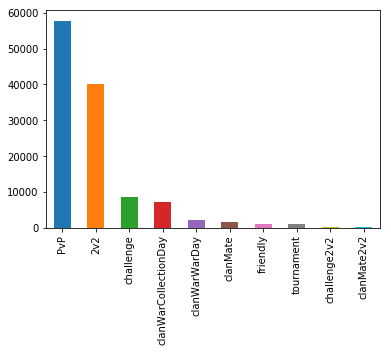

In [26]:
battles_df.type.value_counts().plot(kind = "bar");

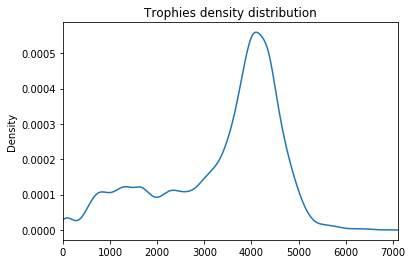

In [28]:
battles_df.opponent[battles_df.opponent.apply(lambda x:"startTrophies" in x[0].keys())].apply(lambda x:x[0]["startTrophies"]).sort_values().plot(kind = "kde");
plt.xlim(0,7100)
plt.title("Trophies density distribution");

In [34]:
PvP_battles_df = battles_df[battles_df.type == "PvP"]

In [58]:
PvPLad_battles_df = PvP_battles_df[PvP_battles_df["mode"].apply(lambda x:x["name"] == "Ladder")]
PvPLad_battles_df

,arena,challengeType,deckType,mode,opponent,opponentCrowns,team,teamCrowns,teamSize,tournamentTag,type,utcTime,winCountBefore,winner
75,"{'name': 'Builder's Workshop', 'arena': 'Arena...",None,slotDeck,"{'name': 'Ladder', 'deck': 'Collection', 'card...","[{'tag': '9CLLQ8LYP', 'name': 'pooya', 'crowns...",3,"[{'tag': '2U0C989V', 'name': 'Teto', 'crownsEa...",0,1,NaN,PvP,1540040761,NaN,-3
76,"{'name': 'Builder's Workshop', 'arena': 'Arena...",None,slotDeck,"{'name': 'Ladder', 'deck': 'Collection', 'card...","[{'tag': 'P29YY0G82', 'name': 'nenapro', 'crow...",2,"[{'tag': '2U0C989V', 'name': 'Teto', 'crownsEa...",1,1,NaN,PvP,1539900819,NaN,-1
79,"{'name': 'Builder's Workshop', 'arena': 'Arena...",None,slotDeck,"{'name': 'Ladder', 'deck': 'Collection', 'card...","[{'tag': 'P0CPC98RV', 'name': 'kingcobra555', ...",1,"[{'tag': '2U0C989V', 'name': 'Teto', 'crownsEa...",1,1,NaN,PvP,1538430539,NaN,0
86,"{'name': 'Builder's Workshop', 'arena': 'Arena...",None,slotDeck,"{'name': 'Ladder', 'deck': 'Collection', 'card...","[{'tag': '9UCLVG2VV', 'name': 'pixoo', 'crowns...",3,"[{'tag': '2U0C989V', 'name': 'Teto', 'crownsEa...",0,1,NaN,PvP,1537355841,NaN,-3
87,"{'name': 'Builder's Workshop', 'arena': 'Arena...",None,slotDeck,"{'name': 'Ladder', 'deck': 'Collection', 'card...","[{'tag': '8GCPV9L9J', 'name': 'jotarojoster', ...",0,"[{'tag': '2U0C989V', 'name': 'Teto', 'crownsEa...",3,1,NaN,PvP,1537185346,NaN,3
88,"{'name': 'Builder's Workshop', 'arena': 'Arena...",None,slotDeck,"{'name': 'Ladder', 'deck': 'Collection', 'card...","[{'tag': 'RQU99CJV', 'name': 'traww', 'crownsE...",1,"[{'tag': '2U0C989V', 'name': 'Teto', 'crownsEa...",0,1,NaN,PvP,1537185125,NaN,-1
90,"{'name': 'Builder's Workshop', 'arena': 'Arena...",None,slotDeck,"{'name': 'Ladder', 'deck': 'Collection', 'card...","[{'tag': '8GVLC8Q80', 'name': 'Conman3030', 'c...",1,"[{'tag': '2U0C989V', 'name': 'Teto', 'crownsEa...",0,1,NaN,PvP,1537161120,NaN,-1
93,"{'name': 'Builder's Workshop', 'arena': 'Arena...",None,slotDeck,"{'name': 'Ladder', 'deck': 'Collection', 'card...","[{'tag': '2LYGRUL2R', 'name': 'kevin', 'crowns...",0,"[{'tag': '2U0C989V', 'name': 'Teto', 'crownsEa...",3,1,NaN,PvP,1537134428,NaN,3
94,"{'name': 'Builder's Workshop', 'arena': 'Arena...",None,slotDeck,"{'name': 'Ladder', 'deck': 'Collection', 'card...","[{'tag': '9LG0J28P8', 'name': 'Magnifico', 'cr...",0,"[{'tag': '2U0C989V', 'name': 'Teto', 'crownsEa...",3,1,NaN,PvP,1537134145,NaN,3
95,"{'name': 'Builder's Workshop', 'arena': 'Arena...",None,slotDeck,"{'name': 'Ladder', 'deck': 'Collection', 'card...","[{'tag': '9JQLYLGYL', 'name': 'ambar hr', 'cro...",0,"[{'tag': '2U0C989V', 'name': 'Teto', 'crownsEa...",1,1,NaN,PvP,1537134009,NaN,1


In [85]:
#Build deck df for both side of the battle
from operator import itemgetter

team_deck_id = pd.DataFrame(PvPLad_battles_df.team.apply(lambda x:map(itemgetter('id'), x[0]["deck"])).values.tolist())
oppo_deck_id = pd.DataFrame(PvPLad_battles_df.opponent.apply(lambda x:map(itemgetter('id'), x[0]["deck"])).values.tolist())

In [253]:
# make a deck dictionary for id to other data lookup
deck_raw_df = pd.DataFrame(PvPLad_battles_df.opponent.apply(lambda x:x[0]["deck"]).values.flatten())

Cards_df = pd.DataFrame(list(chain(*deck_raw_df[0].values))).drop_duplicates()

Cards = Cards_df.set_index("id").sort_index()
Cards = Cards.drop(["level","requiredForUpgrade"],axis = 1).drop_duplicates()
Cards.head()

,arena,description,elixir,icon,key,maxLevel,name,rarity,type
id,,,,,,,,,
26000000,0,A tough melee fighter. The Barbarian's handsom...,3,https://api-assets.clashroyale.com/cards/300/j...,knight,13,Knight,Common,Troop
26000001,0,A pair of lightly armored ranged attackers. Th...,3,https://api-assets.clashroyale.com/cards/300/W...,archers,13,Archers,Common,Troop
26000002,1,"Three fast, unarmored melee attackers. Small, ...",2,https://api-assets.clashroyale.com/cards/300/X...,goblins,13,Goblins,Common,Troop
26000003,0,"Slow but durable, only attacks buildings. A re...",5,https://api-assets.clashroyale.com/cards/300/A...,giant,11,Giant,Rare,Troop
26000004,4,"A heavily armored, slow melee fighter. Swings ...",7,https://api-assets.clashroyale.com/cards/300/M...,pekka,8,P.E.K.K.A,Epic,Troop


In [116]:

print(team_deck_id.shape)
print(len(list(chain(*list(pd.concat([team_deck_id, oppo_deck_id]).values))))/8/2)
#check length of output chained id list

(57704, 8)
57704.0


In [312]:
#Add both team and opponent cards usage to calculate card usage
Card_Usage = pd.Series(list(chain(*list(pd.concat([team_deck_id, oppo_deck_id]).values)))).value_counts(normalize = True)

In [313]:
#define a function that translate card id to card name
def cardIdToName(id):
    name = Cards.loc[id]["name"]
    return name



In [317]:
cardIdToName(Card_Usage.index).to_frame()
Card_Usage.values

array([0.04785197, 0.04077707, 0.04023984, 0.03945025, 0.03824475,
       0.03705441, 0.03682912, 0.0334563 , 0.02633483, 0.02559506,
       0.02496036, 0.02473507, 0.02375918, 0.02342234, 0.02004302,
       0.01973   , 0.01869346, 0.01780206, 0.01705579, 0.0161893 ,
       0.01598026, 0.01465128, 0.0144    , 0.01312734, 0.01308726,
       0.01231717, 0.01218936, 0.0121807 , 0.01181027, 0.01159365,
       0.01117882, 0.01107592, 0.01059827, 0.01048779, 0.01010437,
       0.01008812, 0.00981951, 0.00961913, 0.00958122, 0.00913065,
       0.00908299, 0.00860101, 0.00851761, 0.00827716, 0.00759696,
       0.00735976, 0.00715072, 0.00703699, 0.006998  , 0.00676621,
       0.00636546, 0.00583582, 0.00578708, 0.00567985, 0.00554338,
       0.00536141, 0.00514696, 0.00511555, 0.00501807, 0.00458482,
       0.00418515, 0.00404651, 0.00393604, 0.00383531, 0.00379306,
       0.00365768, 0.00359269, 0.00316702, 0.0031172 , 0.00308471,
       0.00307279, 0.00298073, 0.00245   , 0.00231895, 0.00210

In [315]:
pd.concat([cardIdToName(Card_Usage.index),Card_Usage],axis=1)

,name,0
26000012,Skeleton Army,0.047852
26000017,Wizard,0.040777
28000008,Zap,0.040240
26000011,Valkyrie,0.039450
28000000,Fireball,0.038245
26000015,Baby Dragon,0.037054
26000007,Witch,0.036829
26000021,Hog Rider,0.033456
26000022,Minion Horde,0.026335
28000001,Arrows,0.025595


In [101]:
pd.concat([PvPLad_battles_df.team.apply(lambda x: "Witch" in map(itemgetter('name'), x[0]["deck"])), PvPLad_battles_df.opponent.apply(lambda x: "Witch" in map(itemgetter('name'), x[0]["deck"]))]).value_counts(normalize = True)

False    0.705367
True     0.294633
dtype: float64

About 30% of the user in all use the Witch.